In [3]:
import numpy as np 
pi = np.pi 

eps0 = 8.854e-12
mu0 = 4*pi*1e-7
c0 = 3e8


f = 850e6
w = 2*np.pi*f
e_r = 2.1
n = np.sqrt(e_r)
v_phase = c0 / n 
beta = w / v_phase  
wl = v_phase / f
print(f'{beta=}')
print(f'{wl=}')

l = 5 

beta=25.798068211530737
wl=0.243552550356125


A 

In [4]:
def Z_at_z(Z_L, Z0, beta, l):
    return (Z0 * ( Z_L*np.cos(beta*l) + 1j*Z0*np.sin(beta*l) ) / 
                  ( Z0*np.cos(beta*l) + 1j*Z_L*np.sin(beta*l) ) )

Z_L = 78 + 80j
Z0 = 50
Rs = 50 
Z_in = Z_at_z(Z_L=Z_L, Z0=Z0, beta=beta, l=l)
print(f'{Z_in=}')

def calc_rho(Z_L, Z0):
    return (Z_L - Z0) / (Z_L + Z0)

rho = calc_rho(Z_L=Z_in, Z0=Z0)
print(f'{rho=}')
print(f'{np.abs(rho)=}')

V0 = 100
V_plus = V0*(Z_in / (Z_in+Rs))
print(f'{V_plus=}')
print(f'{np.abs(V_plus)=}')

W_plus = (np.abs(V_plus)**2) / (2*Z_in)
print(f'{W_plus=}')
print(f'{np.abs(W_plus)=}')
print(f'{np.abs(W_plus)*(1-np.abs(rho)**2)=}')

Z_in=(140.16700876753586+69.13502325154559j)
rho=(0.5355339224199888+0.16885617164174496j)
np.abs(rho)=0.5615238096145567
V_plus=(76.77669612099945+8.442808582087249j)
np.abs(V_plus)=77.23951115853892
W_plus=(17.11727528089888-8.44280858208725j)
np.abs(W_plus)=19.086176405866052
np.abs(W_plus)*(1-np.abs(rho)**2)=13.068133423960251


B 

In [5]:
ZL = 78+80j
YL = 1/ZL 
Z0 = 50
Y0 = 1/Z0

l1 = 0.0528
l2 = 0.0216

# l1 = 0.0552
# l2 = 0.0245
print(rf'{YL=}')
Y_in = Z_at_z(YL, Y0, beta, l1)
print(f'{Y_in=}')

def cot(x):
    return np.cos(x) / np.sin(x)

Y_ins = -1j*Y0*cot(beta*l2)
print(f'{Y_ins=}')

print(f'{Y_in + Y_ins}')
print(f'{Y0}')

l2o = 0.816
Y_ino = 1j*Y0*np.tan(beta*l2o)
print(f'{Y_ino=}')
print(f'{Y_in + Y_ino=}')

YL=(0.006247997436718999-0.006408202499198974j)
Y_in=(0.01714417680893536+0.024969047465084486j)
Y_ins=-0.03209711773866247j
(0.01714417680893536-0.007128070273577987j)
0.02
Y_ino=(-0-0.027380372946149093j)
Y_in + Y_ino=(0.01714417680893536-0.002411325481064607j)


C 

In [9]:
V0 = 100
Z_in = 50 
Rs = 50 
V_plus = V0*(Z_in / (Z_in+Z0))
print(f'{V_plus=}')
print(f'{np.abs(V_plus)=}')
W_plus = V_plus**2 / (2*Z_in)
print(f'{W_plus=}')

V_plus=50.0
np.abs(V_plus)=50.0
W_plus=25.0


In [49]:
c0 = 3e8 
e_r = 2.1
n = np.sqrt(e_r)
v_phase = c0 / n
Z0 = 50 
Y0 = 1/Z0 

# orig smith 
# l1 = 0.0528
# l2s = 0.0216
l2o = 0.816

# fixed empirically 
l1 = 0.0552
l2s = 0.0245

def cot(x):
    return np.cos(x) / np.sin(x)

def Z_at_z(Z_L, Z0, beta, l):
    return (Z0 * ( Z_L*np.cos(beta*l) + 1j*Z0*np.sin(beta*l) ) / 
                  ( Z0*np.cos(beta*l) + 1j*Z_L*np.sin(beta*l) ) )

def get_rho(f, short=True):
    w = 2*np.pi*f
    beta = w / v_phase
    Z_L = 78 + 1j*(80 + 1e-6*0.25*(f-850e6)) # TODO: do they mean with the e6 or without?  
    Z_in = Z_at_z(Z_L, Z0, beta, l1)
    Y_in = 1/Z_in 
    
    if short:
        Y_ins = -1j*Y0*cot(beta*l2s)
        Y_final = Y_in + Y_ins 
    else:
        Y_ino = 1j*Y0*np.tan(beta*l2o)
        Y_final = Y_in + Y_ino 
     
    Z_final = 1/Y_final    
    
    rho = (Z_final - Z0) / (Z_final + Z0)
    return np.abs(rho)**2

In [52]:
f = 850e6
rho_short = get_rho(f, short=True)
rho_open = get_rho(f, short=False)
print(f'{rho_open=}')
print(f'{rho_short=}')

rho_open=2.5357156107317975e-05
rho_short=1.6979199120659158e-05


C:\Users\ronen\AppData\Local\Temp\ipykernel_1184\3074873490.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2)


Text(0, 0.5, '$|\\rho|^2$ [DB]')

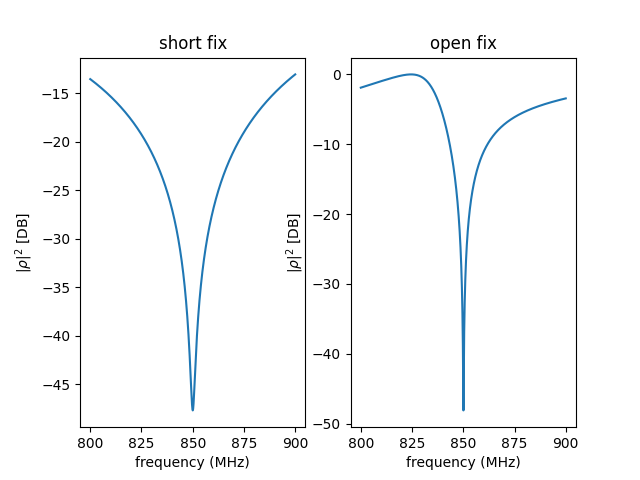

In [51]:
f = np.linspace(800e6, 900e6, int(1e6))
rho_short = get_rho(f, short=True)
rho_open = get_rho(f, short=False)

%matplotlib ipympl
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(1, 2)
axes[0].plot(f*1e-6, 10*np.log10(rho_short))
axes[0].set_title('short fix')
axes[1].plot(f*1e-6, 10*np.log10(rho_open))
axes[1].set_title('open fix')
axes[0].set_xlabel('frequency (MHz)')
axes[1].set_xlabel('frequency (MHz)')
axes[1].set_ylabel(r'$|\rho|^2$ [DB]')
axes[0].set_ylabel(r'$|\rho|^2$ [DB]')
# fig.show()